<a href="https://colab.research.google.com/github/IamDiva4/wine-data-analysis-with-ML/blob/main/Wine_quality_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


In [ ]:
import io

wine = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']))
print(wine)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

## **EDA**

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
#Data has only float and integer values.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
wine.shape

(4898, 12)

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine.drop_duplicates(keep=False, inplace=True)

In [ ]:
#no duplicates left
wine.duplicated()

6       False
9       False
10      False
11      False
12      False
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 3189, dtype: bool

In [ ]:
#rows and columns after cleaning
wine.shape

(3189, 12)

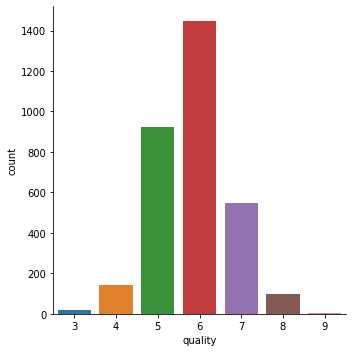

In [ ]:
#“quality” has a high number of values in categories 5, 6 and 7.
#Only a few observations are there for the categories 3 & 9.
sns.catplot(x='quality', data=wine , kind ='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

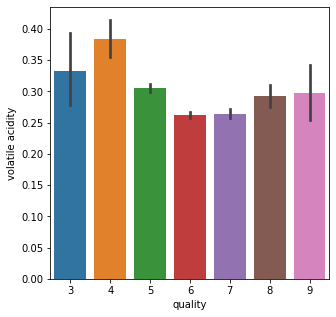

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

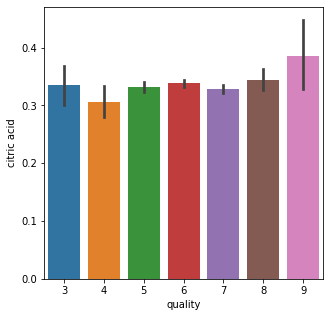

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine)

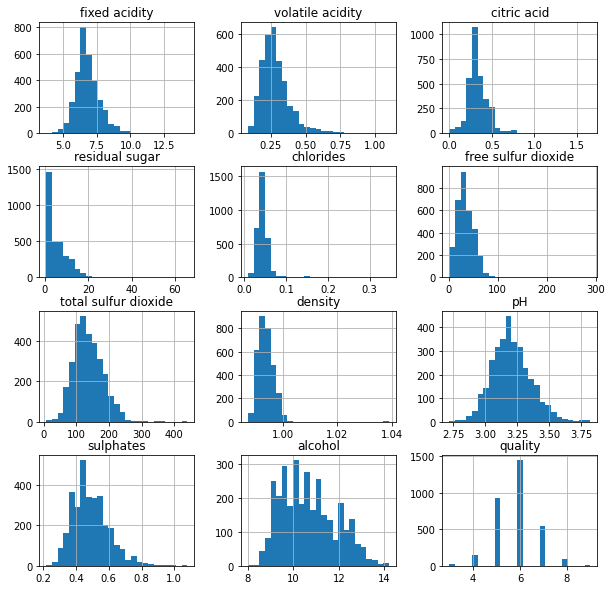

In [ ]:
wine.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

In [ ]:
bins = (2,6.5,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine.head(10)

#transformed quality as 0 as bad and 1 as good

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,1
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,1
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,1
13,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,0
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,0.67,9.7,1
15,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,0
16,6.3,0.48,0.04,1.10,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,0
18,7.4,0.34,0.42,1.10,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,0


In [ ]:
#bad quality is more than good quality
wine['quality'].value_counts()

0    2101
1    1088
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='volatile acidity'>

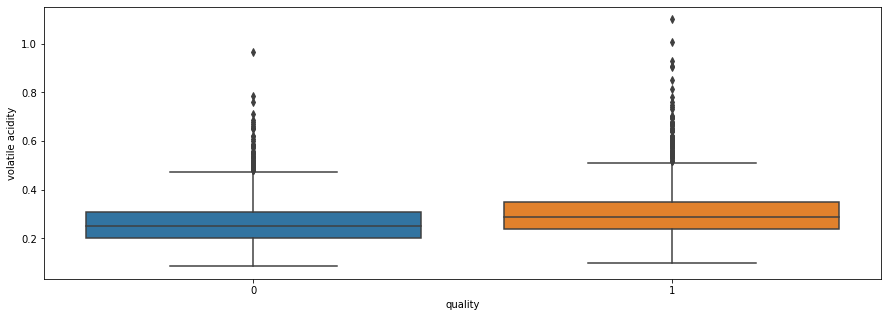

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="volatile acidity", data=wine)


<Axes: >

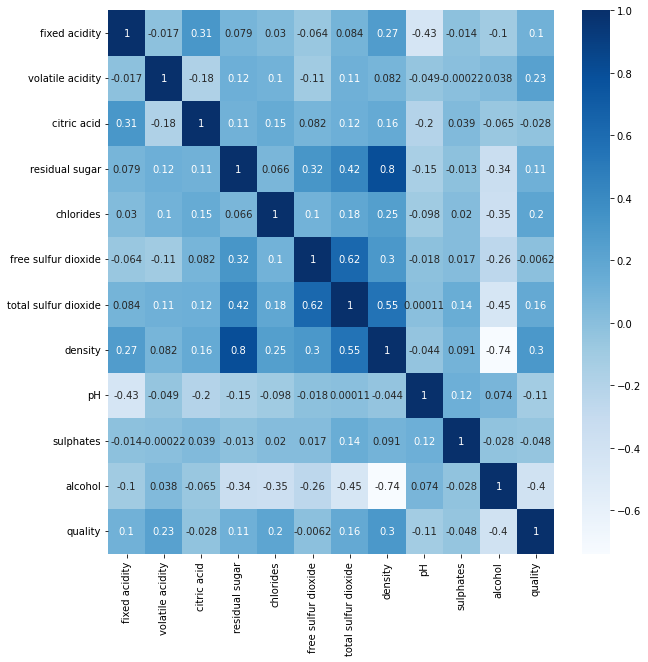

In [ ]:
#density has a strong positive correlation with residual sugar, whereas it has a strong negative correlation with alcohol.
#pH & fixed acidity has negative correlation.
#density & fixed acidity has positive correlation.
#citric acid & fixed acidity has positive correlation.
#citric acid & volatile acidity has negative correlation.
#free sulphur dioxide & total sulphur dioxide has positive correlation.

plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),annot =True,cmap = 'Blues')

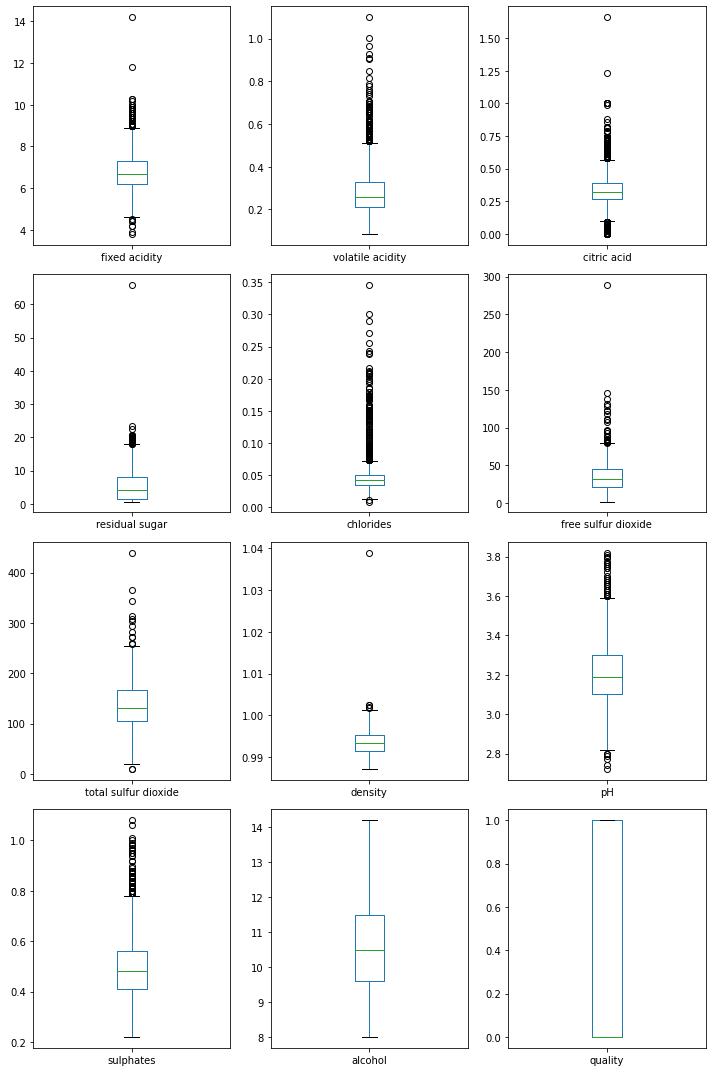

In [ ]:
#Except for alcohol, all other features have outliers.
plt.figure(figsize = (10,15))
for i,col in enumerate(list(wine.columns.values)):
    plt.subplot(4,3,i+1)
    wine.boxplot(col)
    plt.grid()
    plt.tight_layout()


Machine learning models

---



In [ ]:
#separate the dataset as response variable and feature variables
X= wine.drop('quality',axis=1)
y=wine['quality']

In [ ]:
#train and test splitting of data
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)


In [ ]:
#applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train , y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

print("Confusion Matrix :\n",confusion_matrix(y_test, pred_rfc))

print("\nAccuracy",rfc.score(X_train,y_train))
#score is more than other models hence a good model for prediction

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       442
           1       0.72      0.56      0.63       196

    accuracy                           0.80       638
   macro avg       0.77      0.73      0.74       638
weighted avg       0.79      0.80      0.79       638

Confusion Matrix :
 [[400  42]
 [ 87 109]]

Accuracy 1.0


SVM ***Classifier***

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
print(clf.score(X_train,y_train))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       442
           1       0.70      0.54      0.61       196

    accuracy                           0.79       638
   macro avg       0.75      0.72      0.73       638
weighted avg       0.78      0.79      0.78       638

[[396  46]
 [ 91 105]]
0.8075264602116817


In [ ]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train,y_train)
pred =gauss.predict(X_test)
gauss.score(X_train,y_train)

0.7118776950215602

In [ ]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print(gauss.score(X_train,y_train))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       442
           1       0.60      0.56      0.58       196

    accuracy                           0.75       638
   macro avg       0.70      0.69      0.70       638
weighted avg       0.74      0.75      0.75       638

[[368  74]
 [ 87 109]]
0.7118776950215602
